In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Auto dataset in a DataFrame using Pandas

In [181]:
data = pd.read_csv('data/auto-dataset.csv')
print(data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

### 1. Scatterplots between features

In [182]:
cols=data.columns[:-1]
data[cols].head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


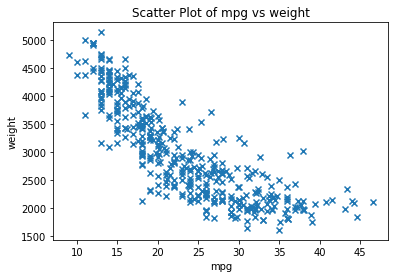

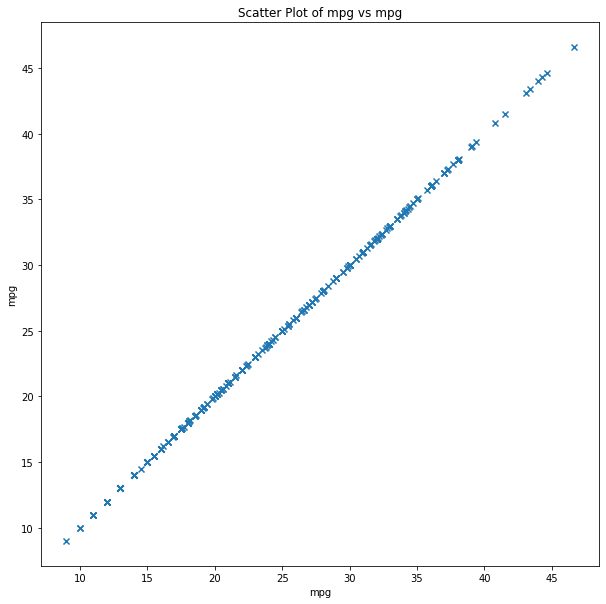

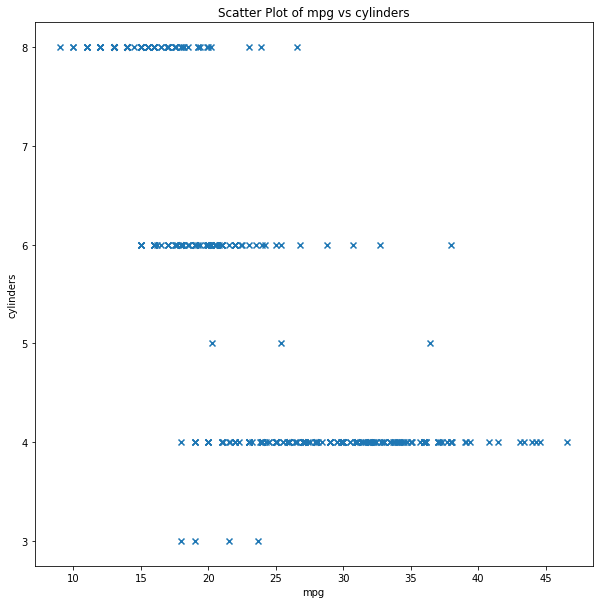

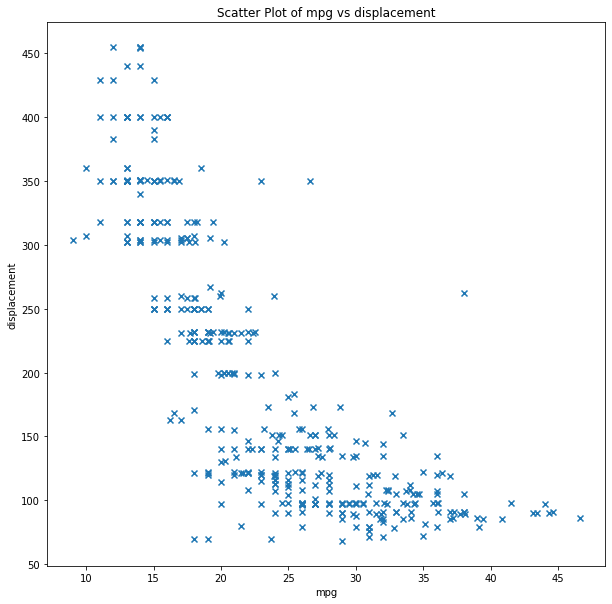

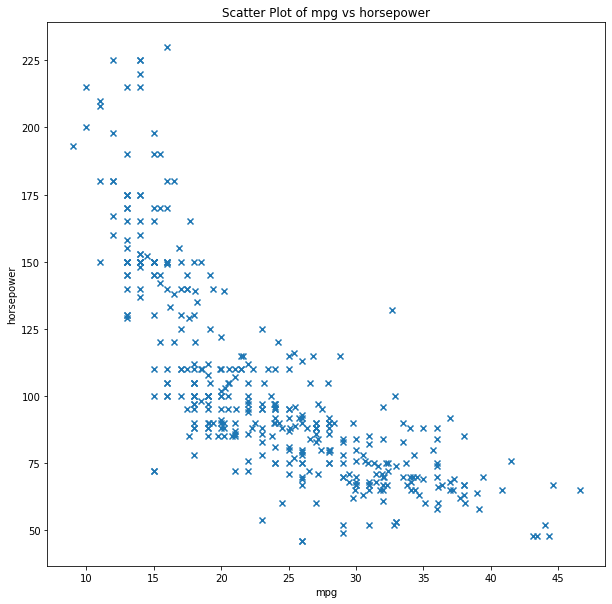

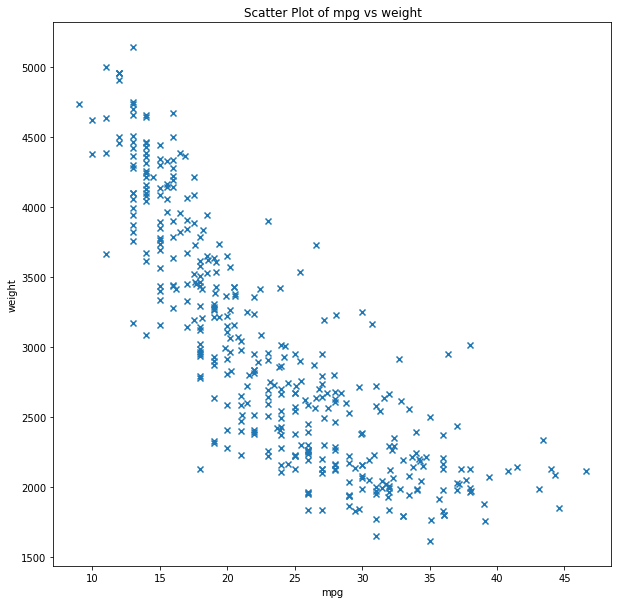

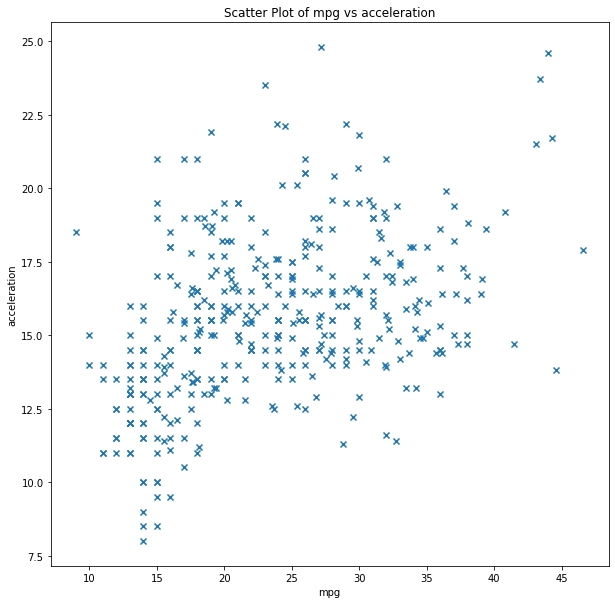

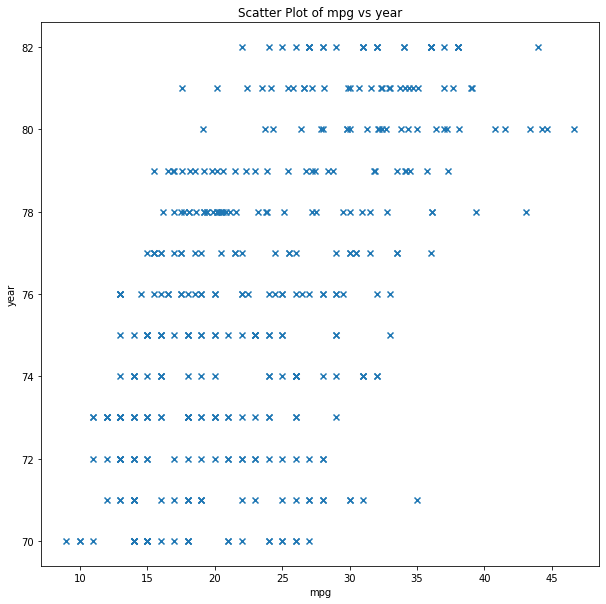

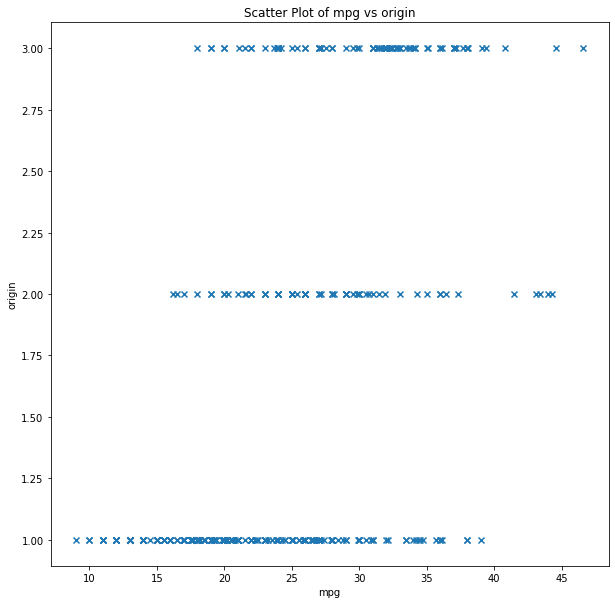

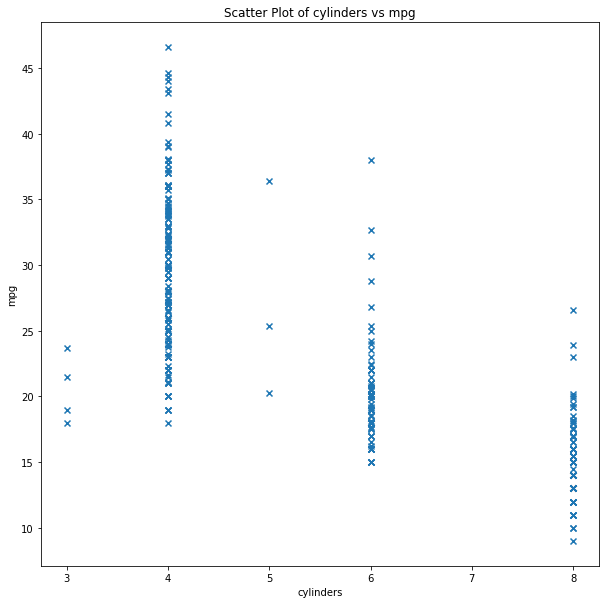

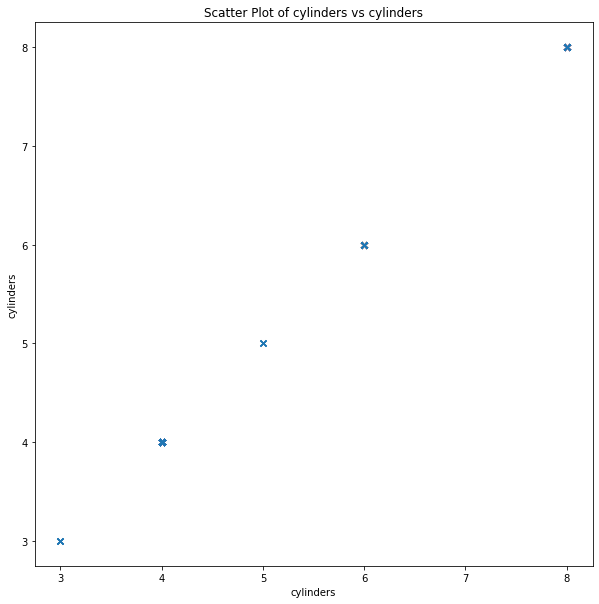

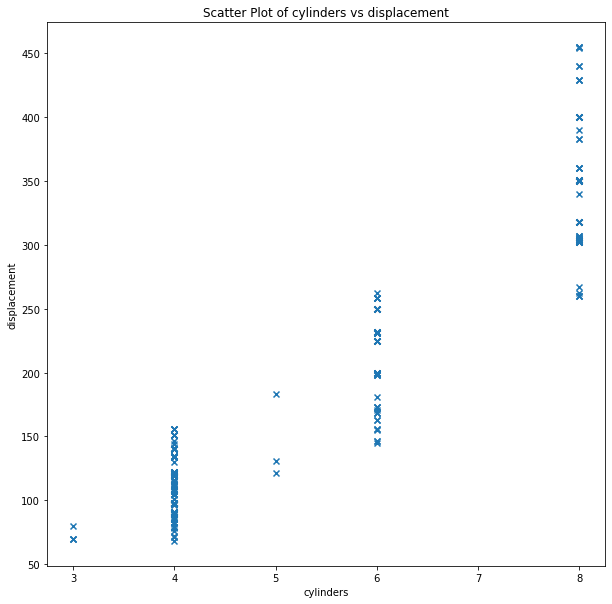

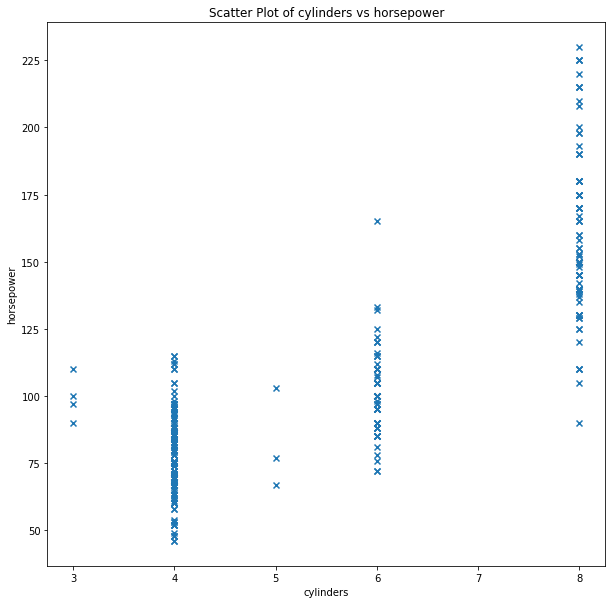

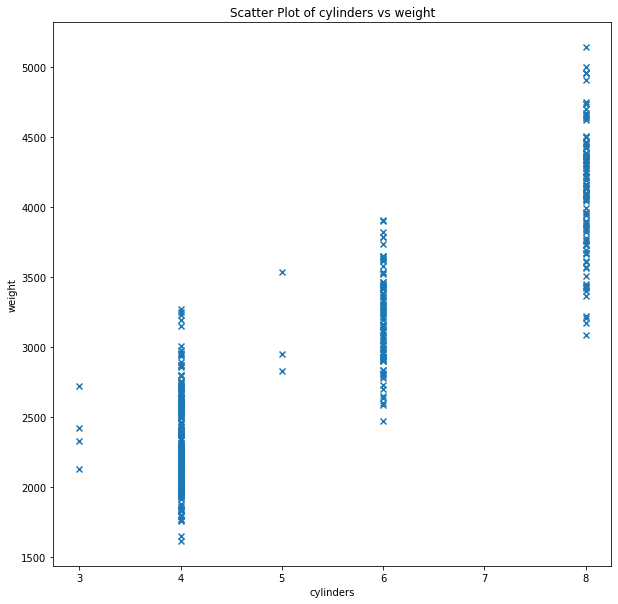

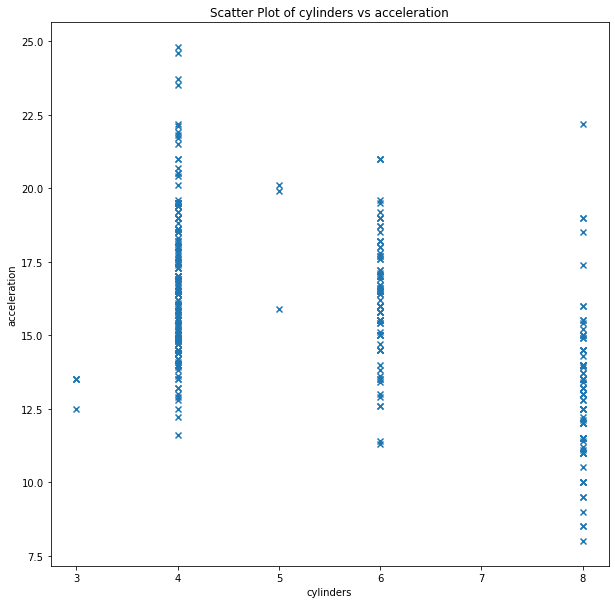

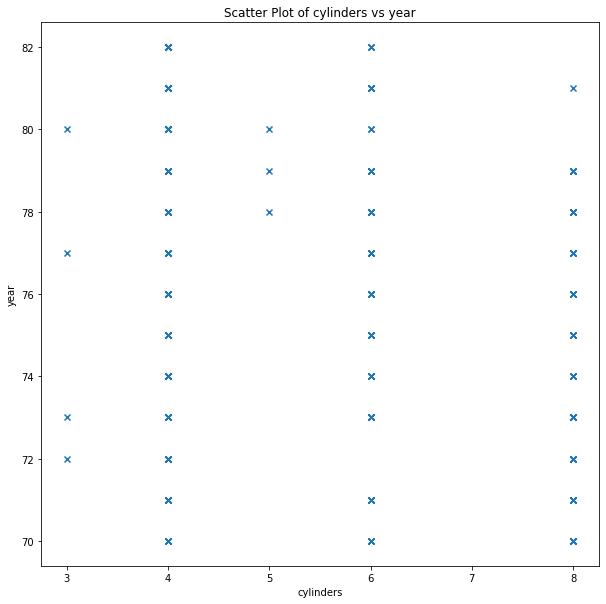

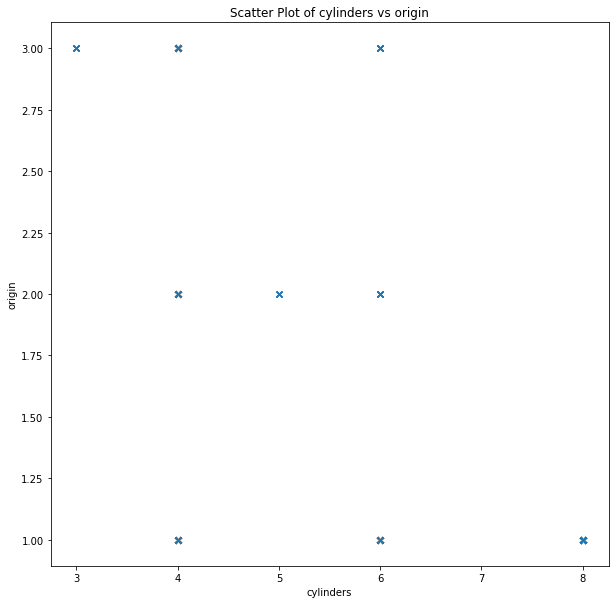

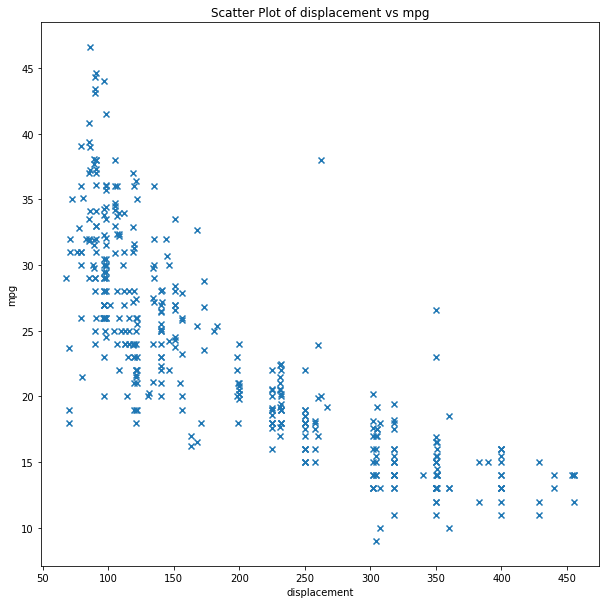

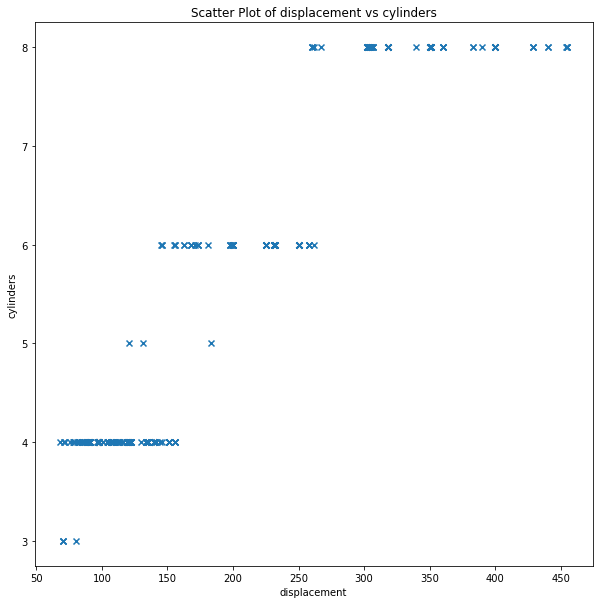

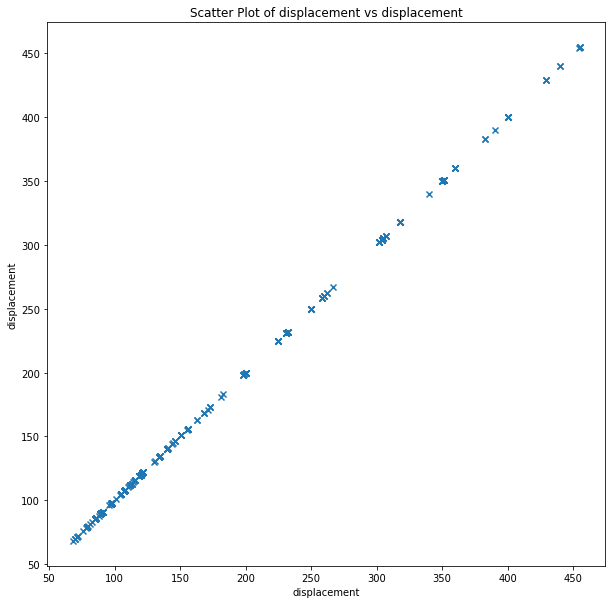

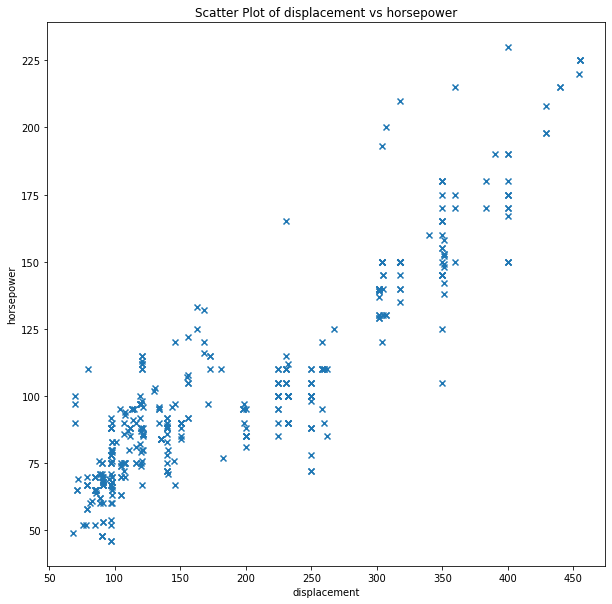

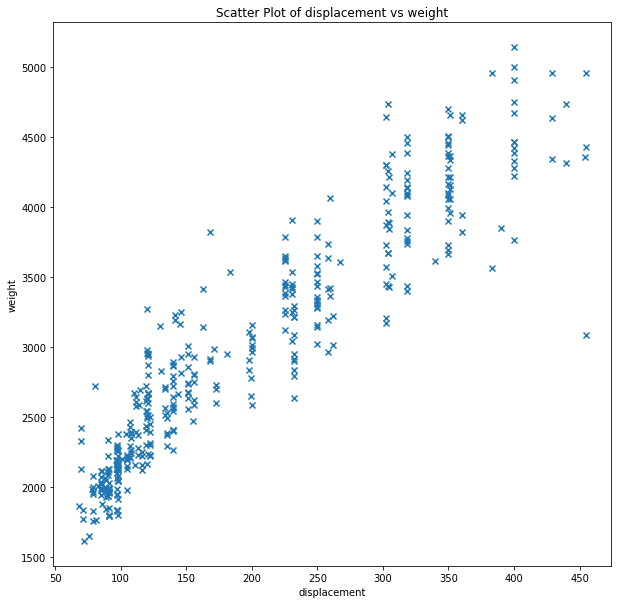

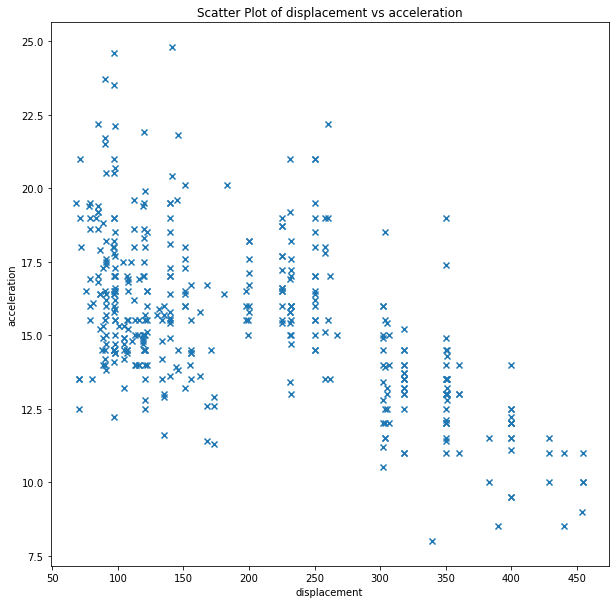

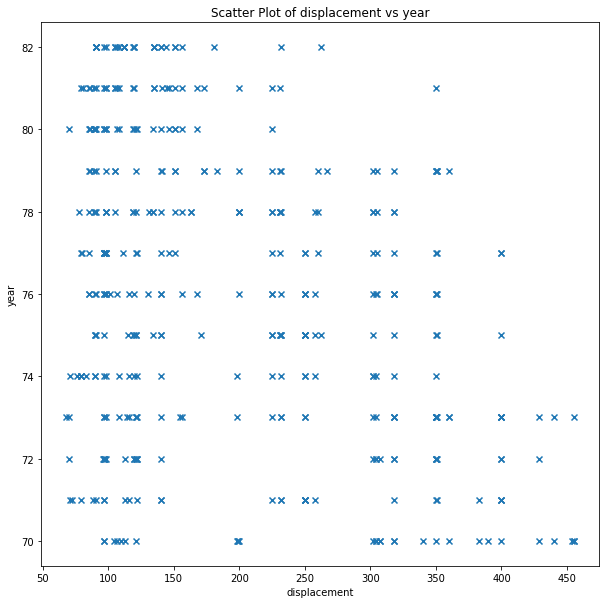

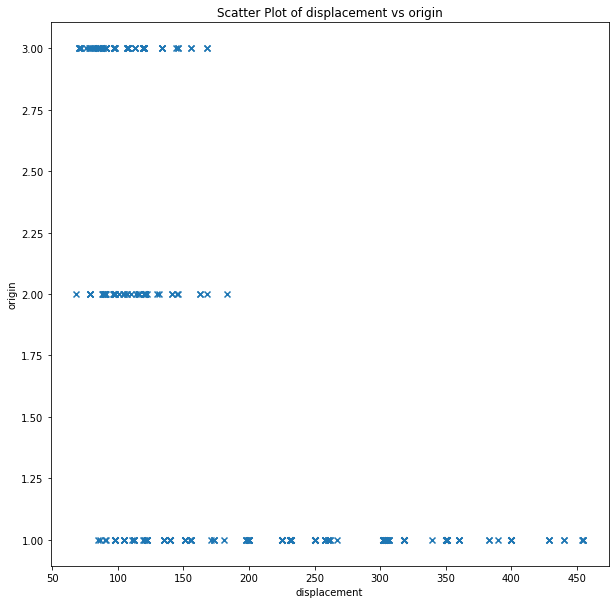

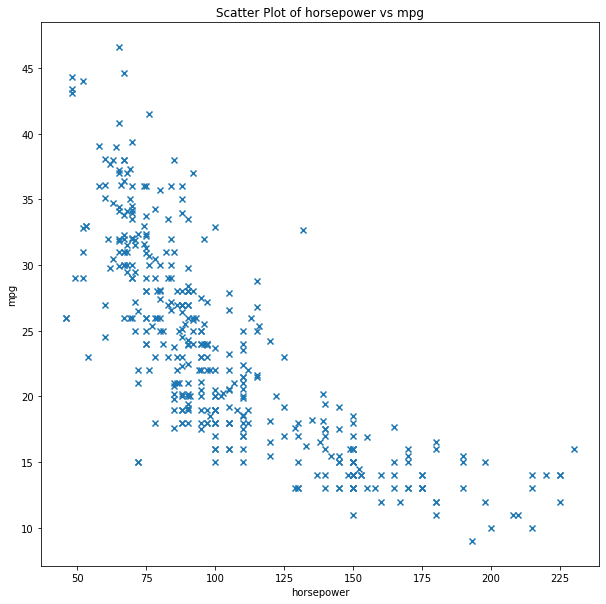

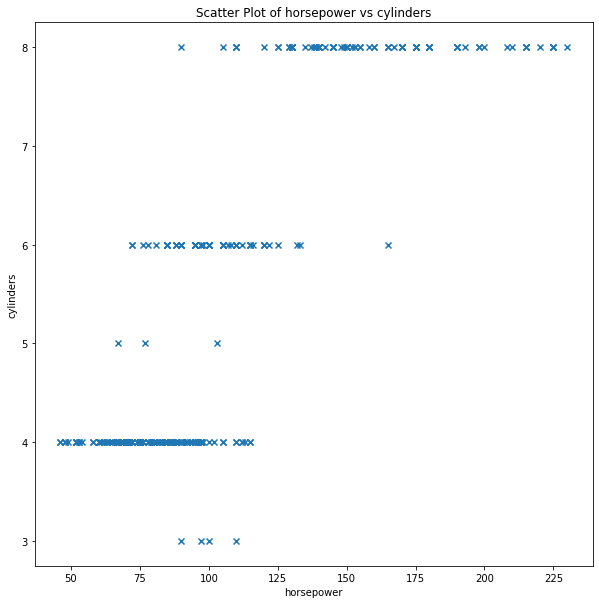

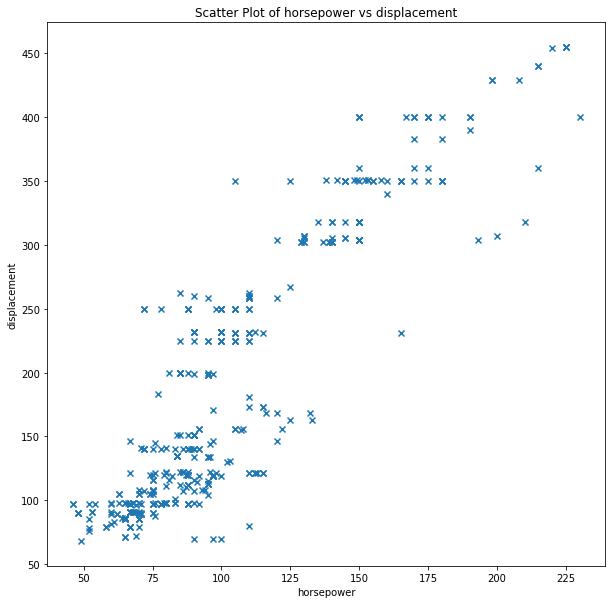

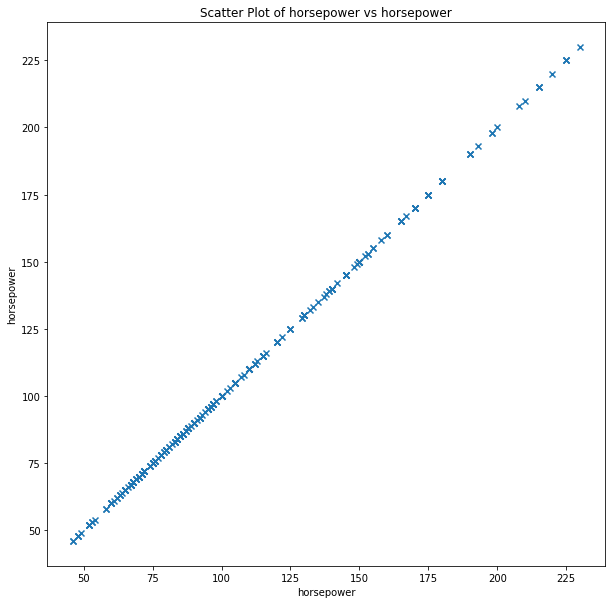

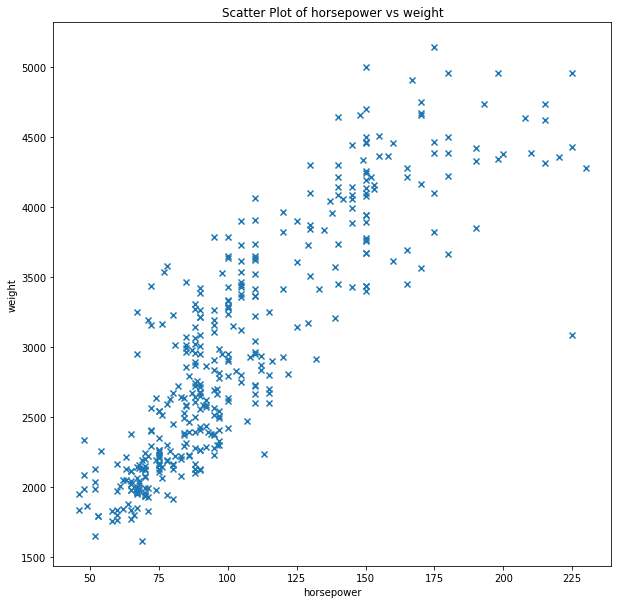

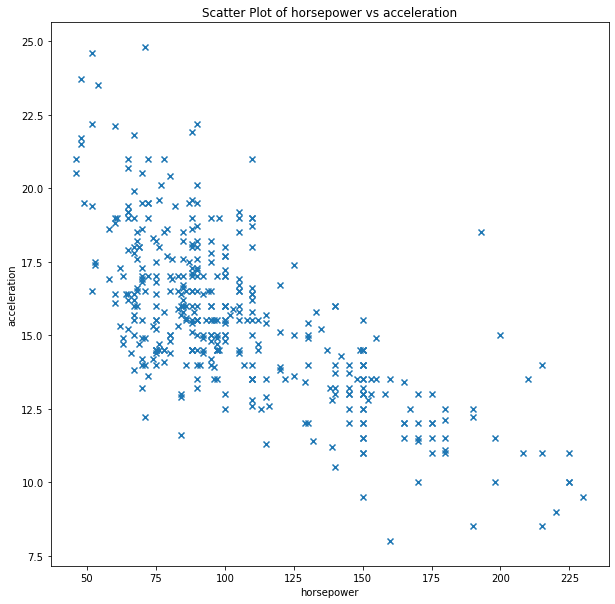

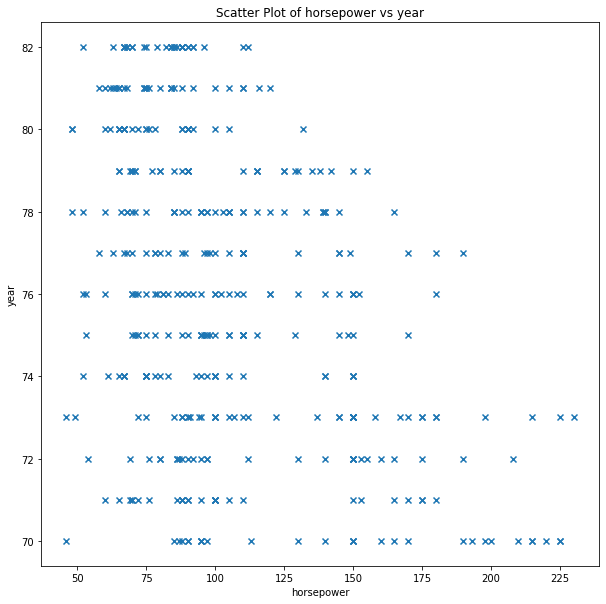

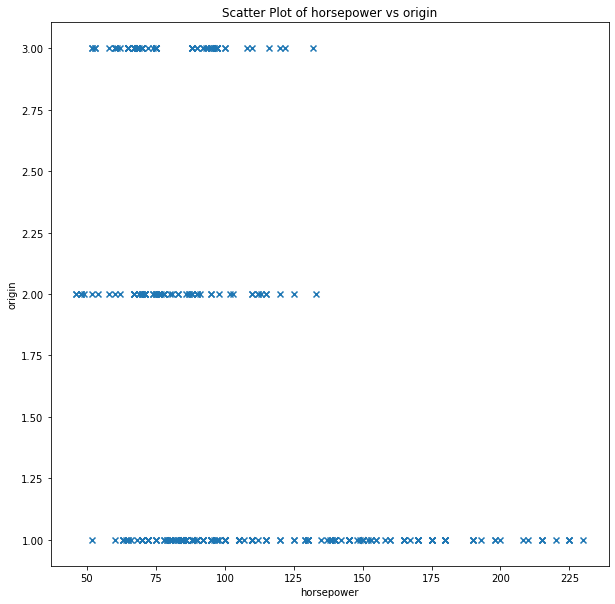

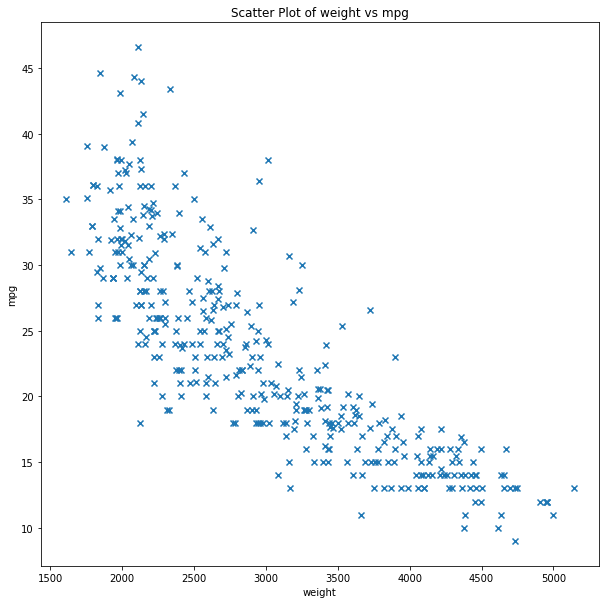

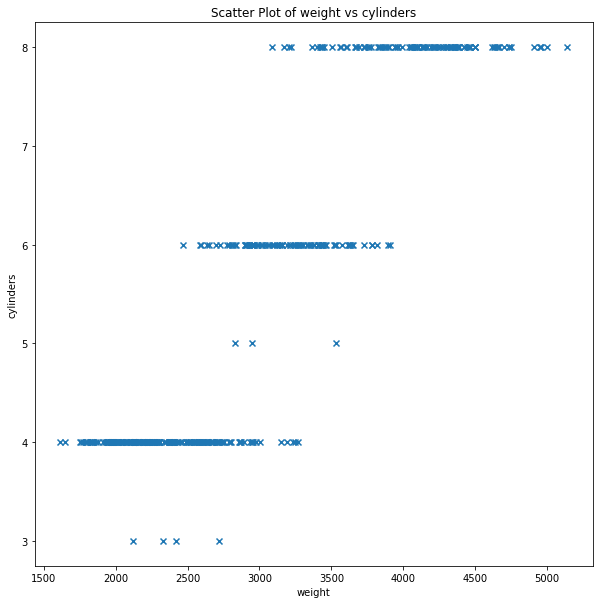

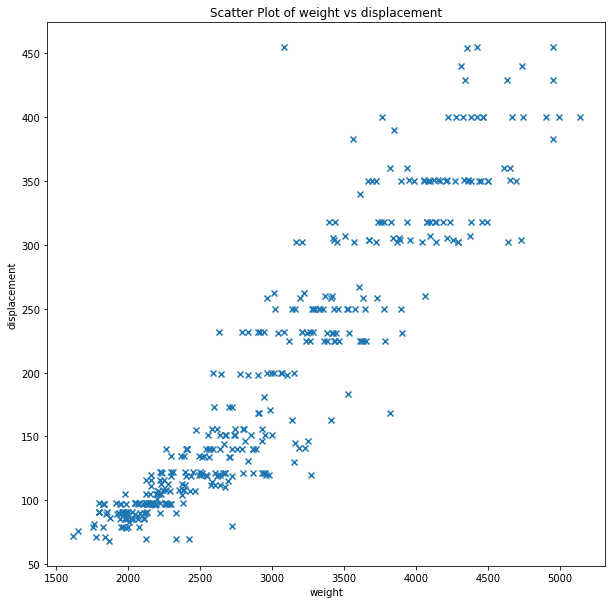

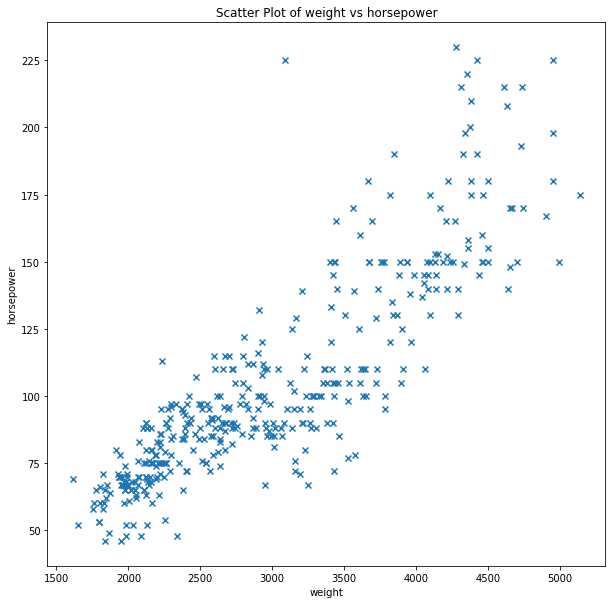

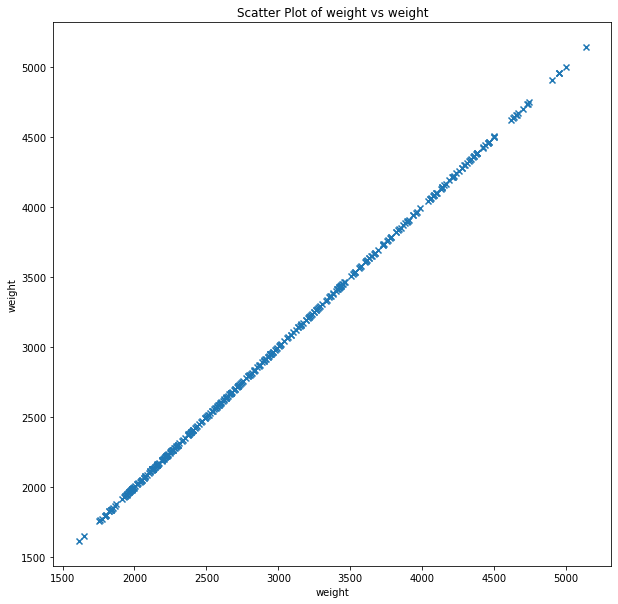

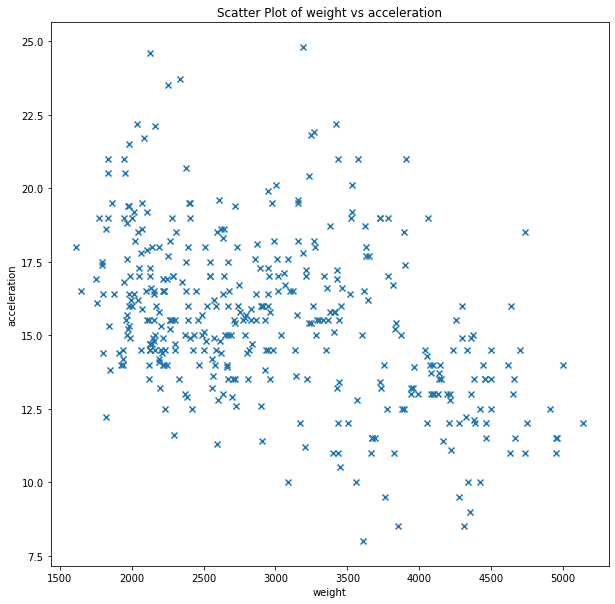

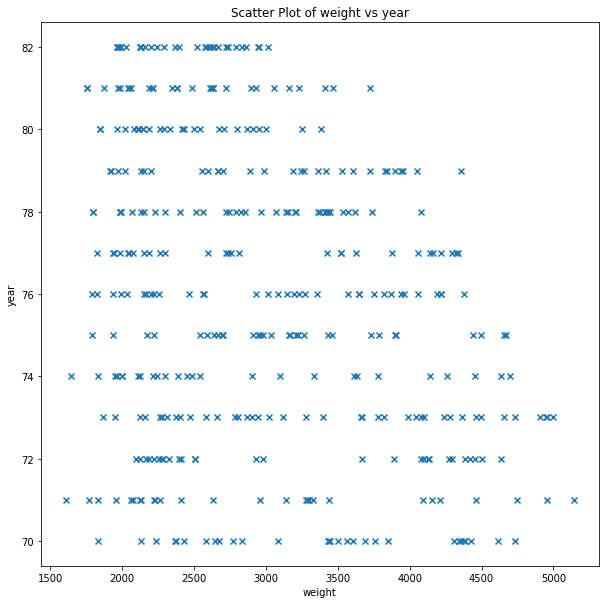

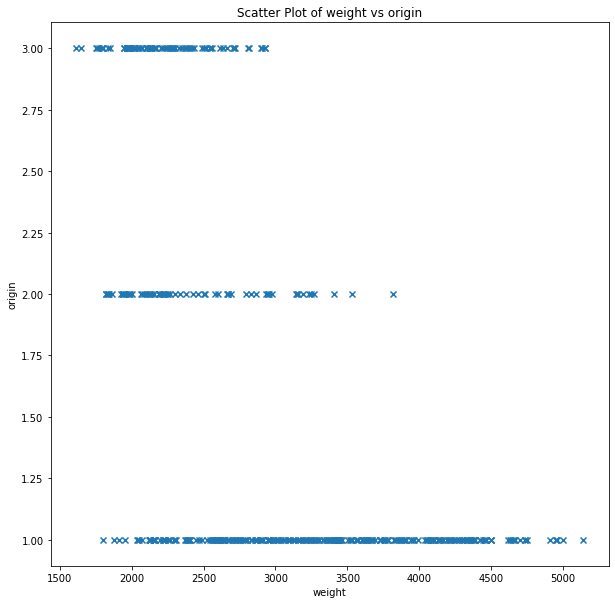

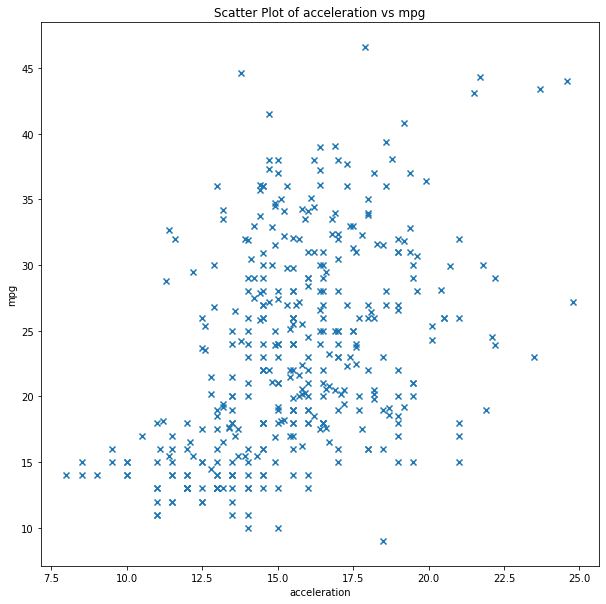

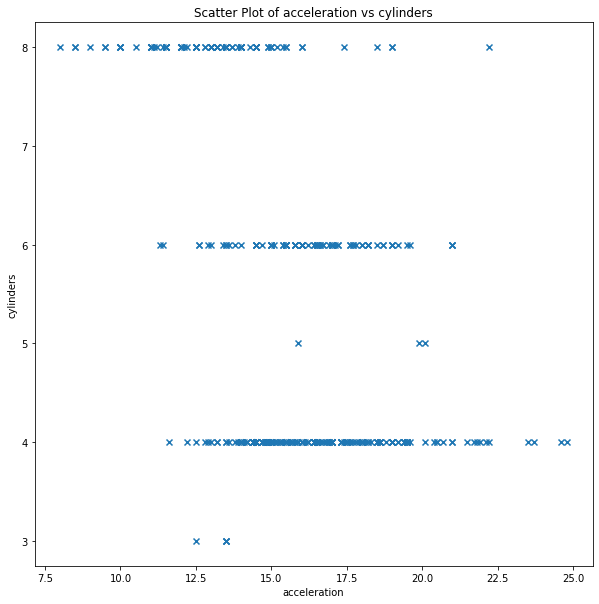

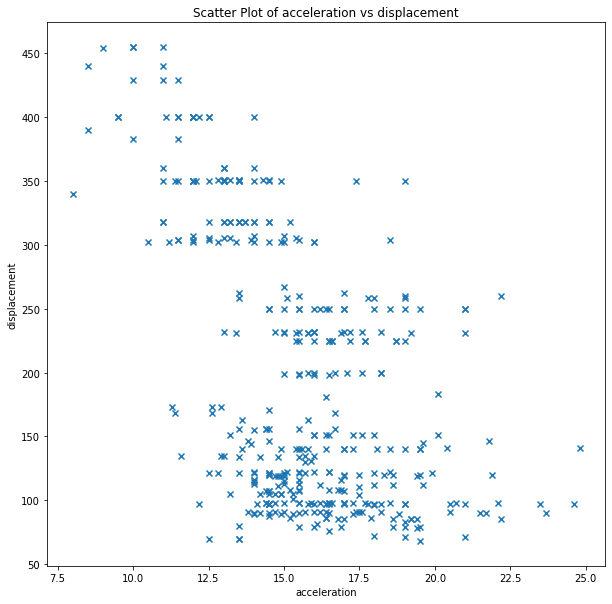

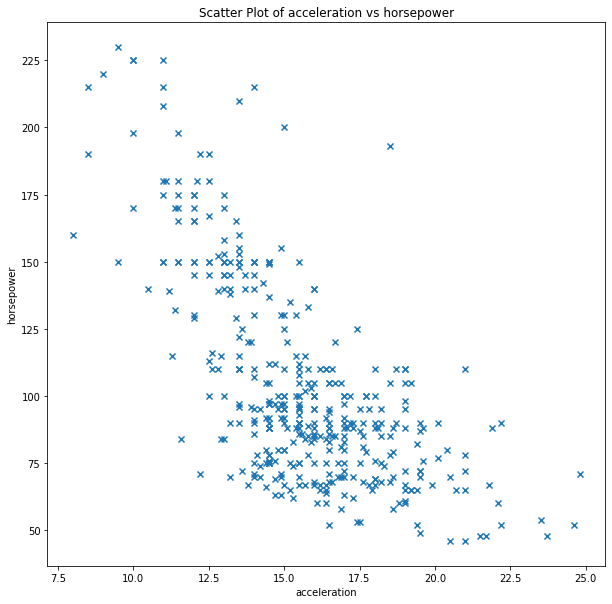

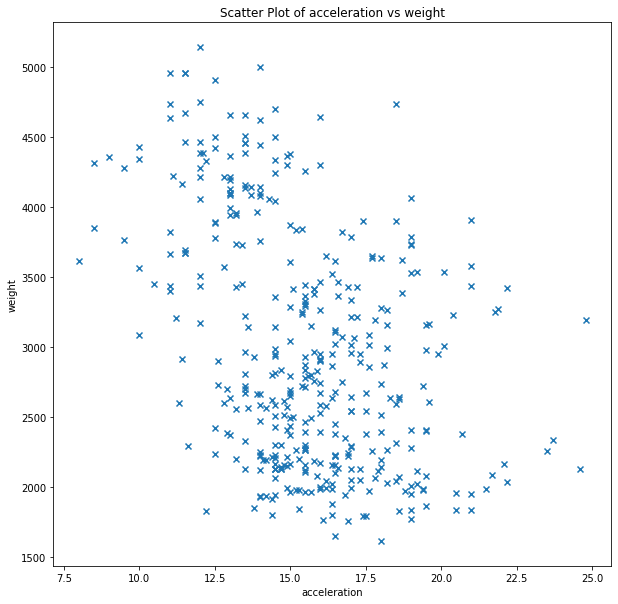

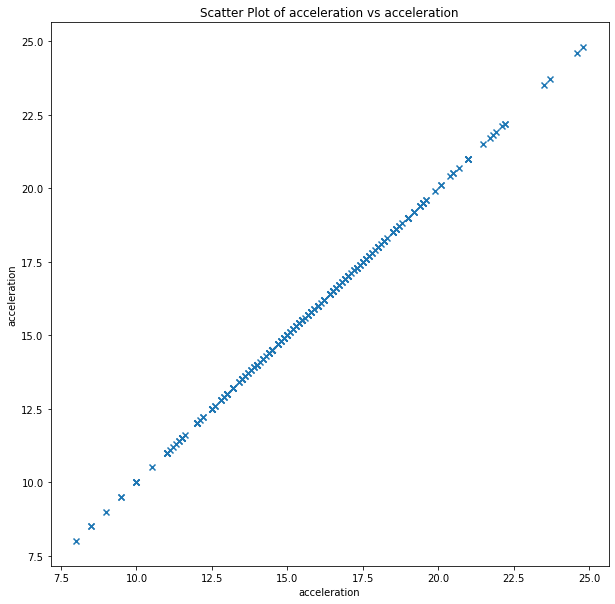

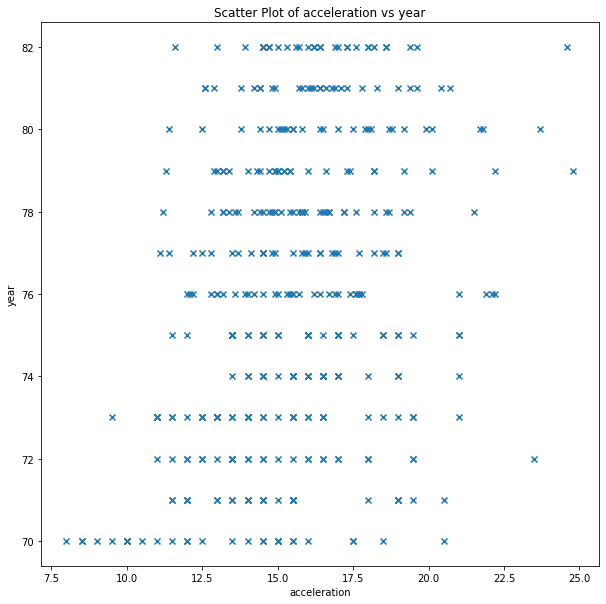

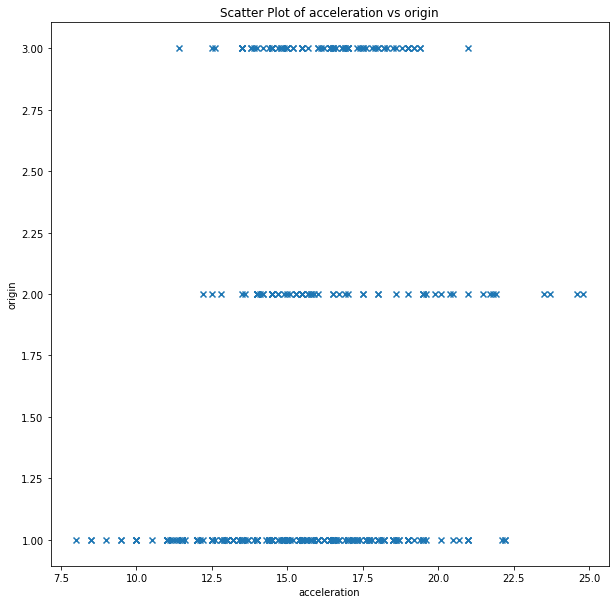

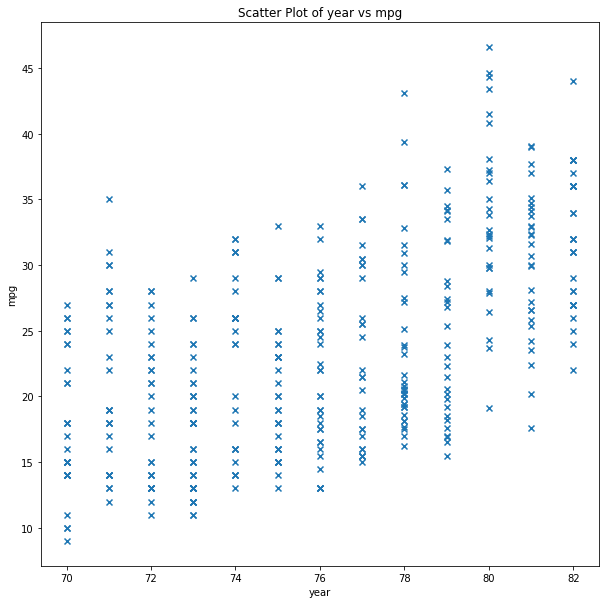

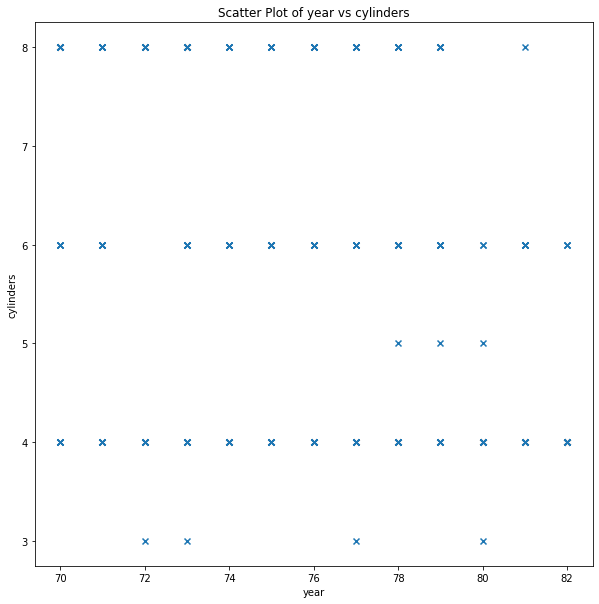

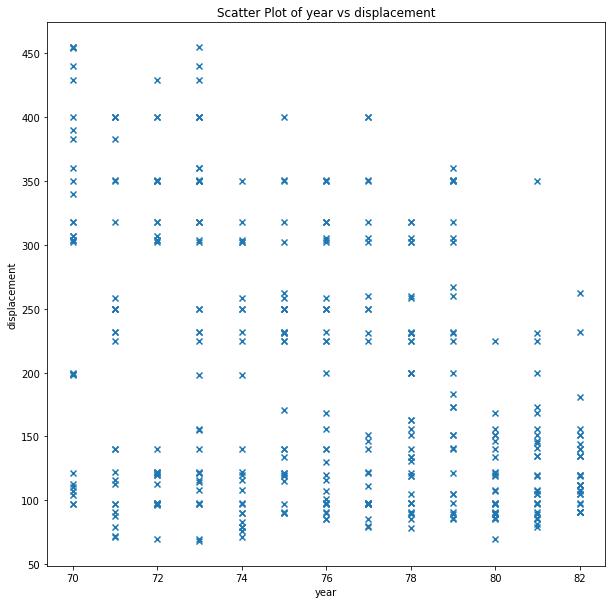

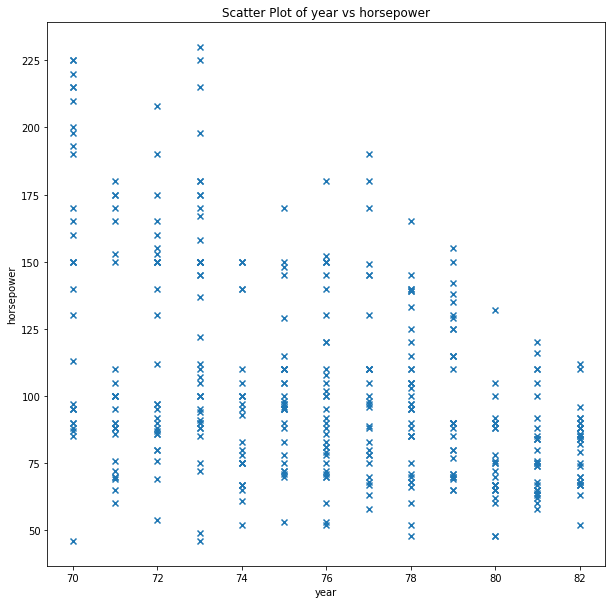

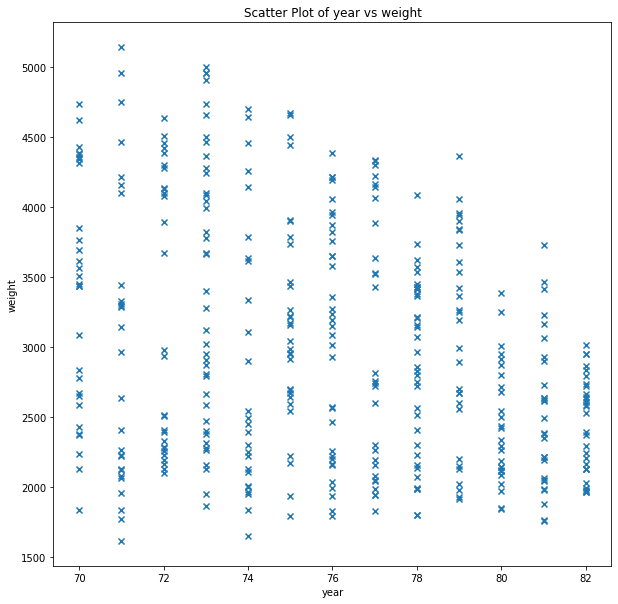

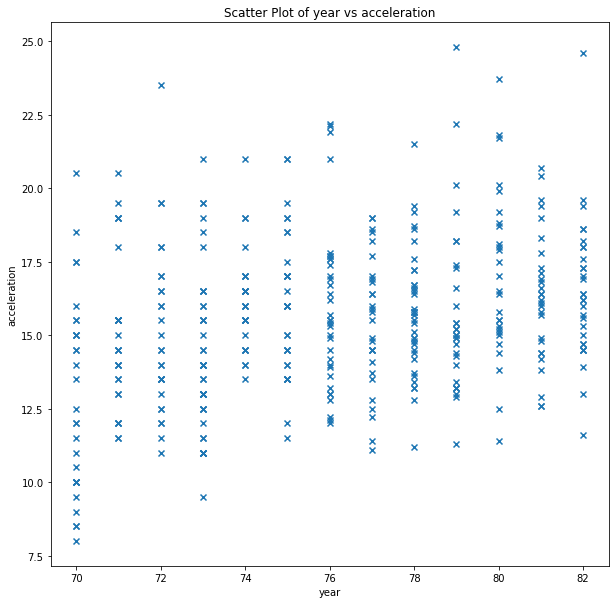

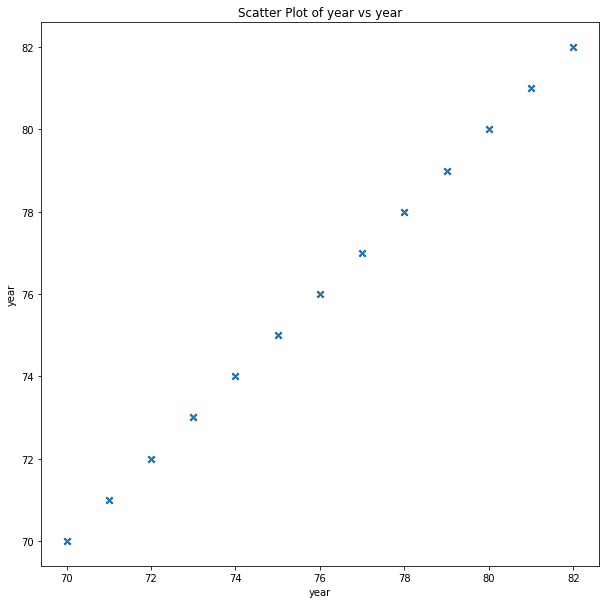

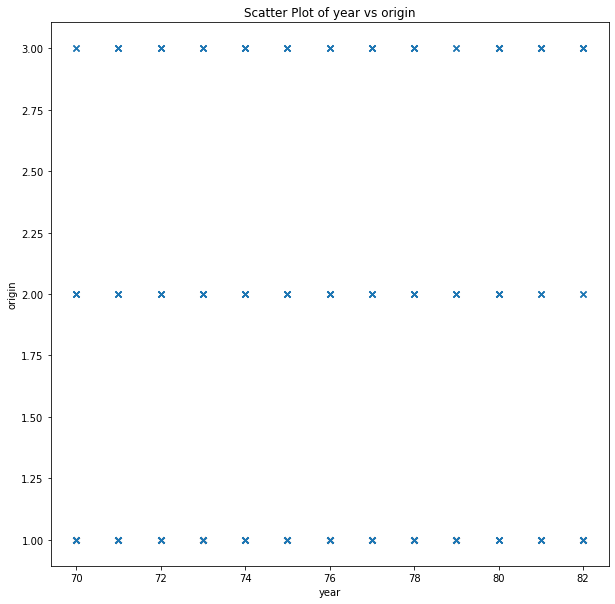

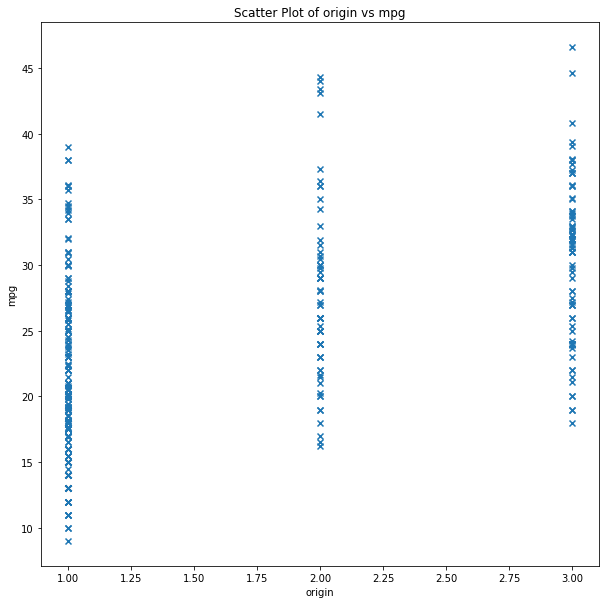

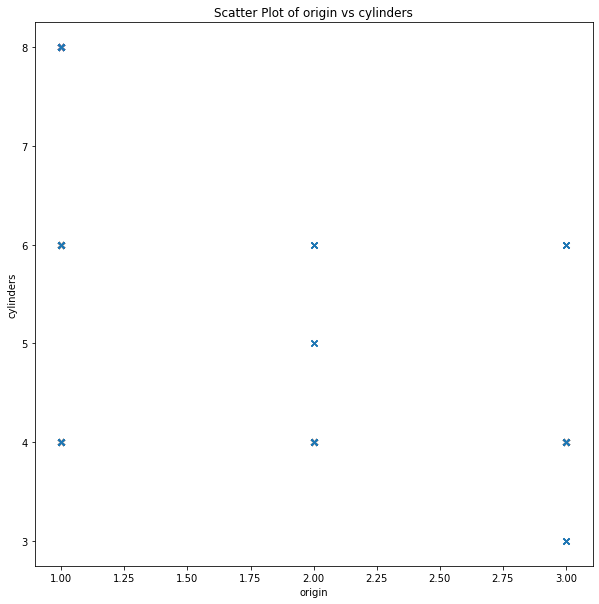

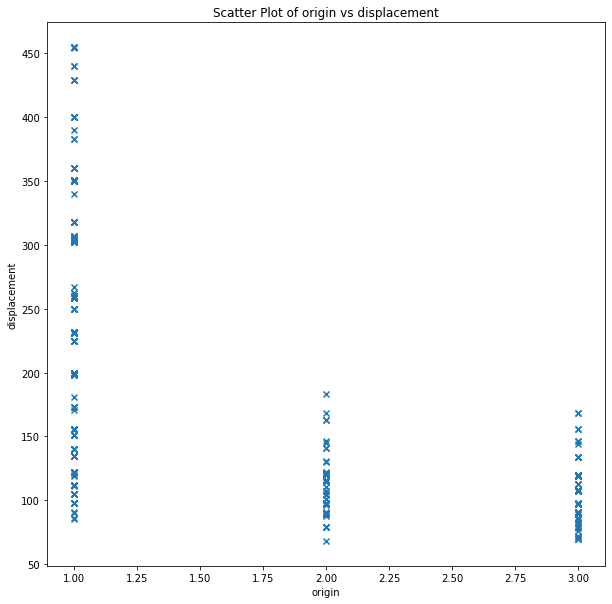

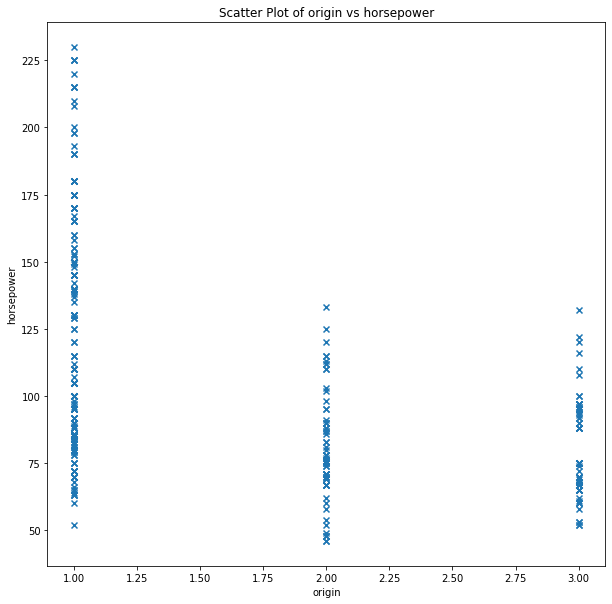

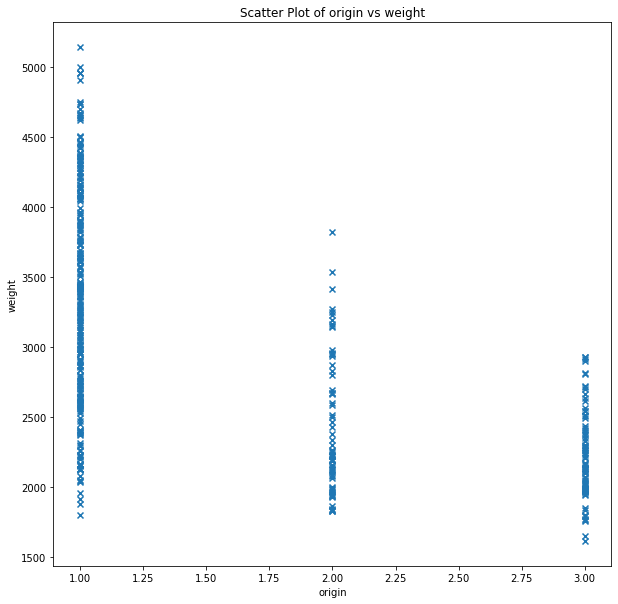

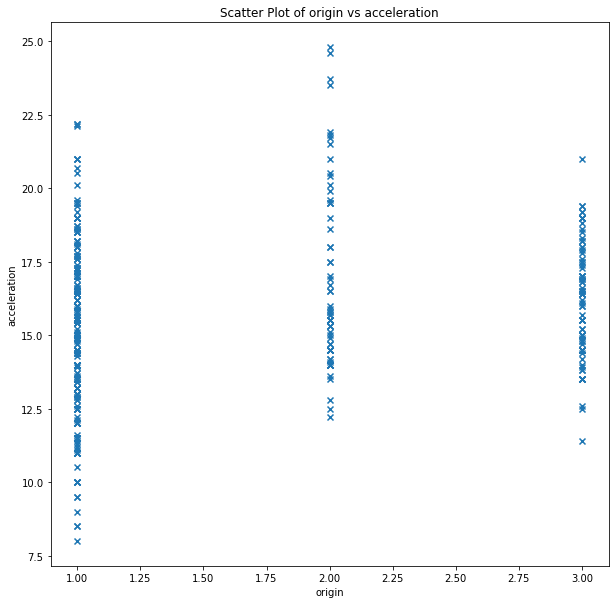

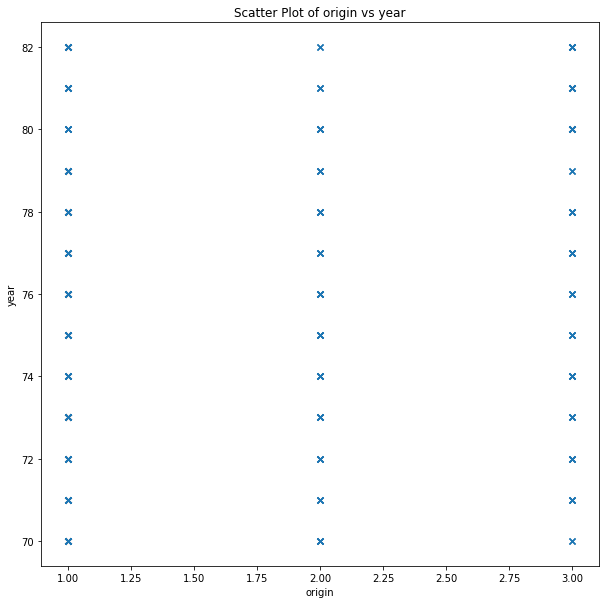

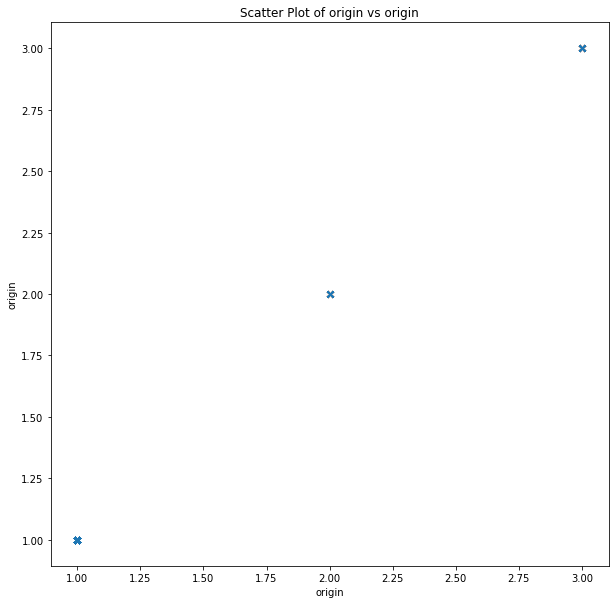

In [183]:
feat1 = data['mpg']
feat2 = data['weight']
plt.figure()
plt.scatter(feat1, feat2, marker='x')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('Scatter Plot of mpg vs weight')
#Similarly add scatter plots for every pair of features
for f1 in cols:
    for f2 in cols: 
        feat1 = data[f1]
        feat2 = data[f2]
        plt.figure(figsize=(10,10))
        plt.scatter(feat1, feat2, marker='x')
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt.title('Scatter Plot of '+f1+' vs '+f2 )

Text(0.5, 0.9, 'Pair Wise Scatter Plots among the Parameters')

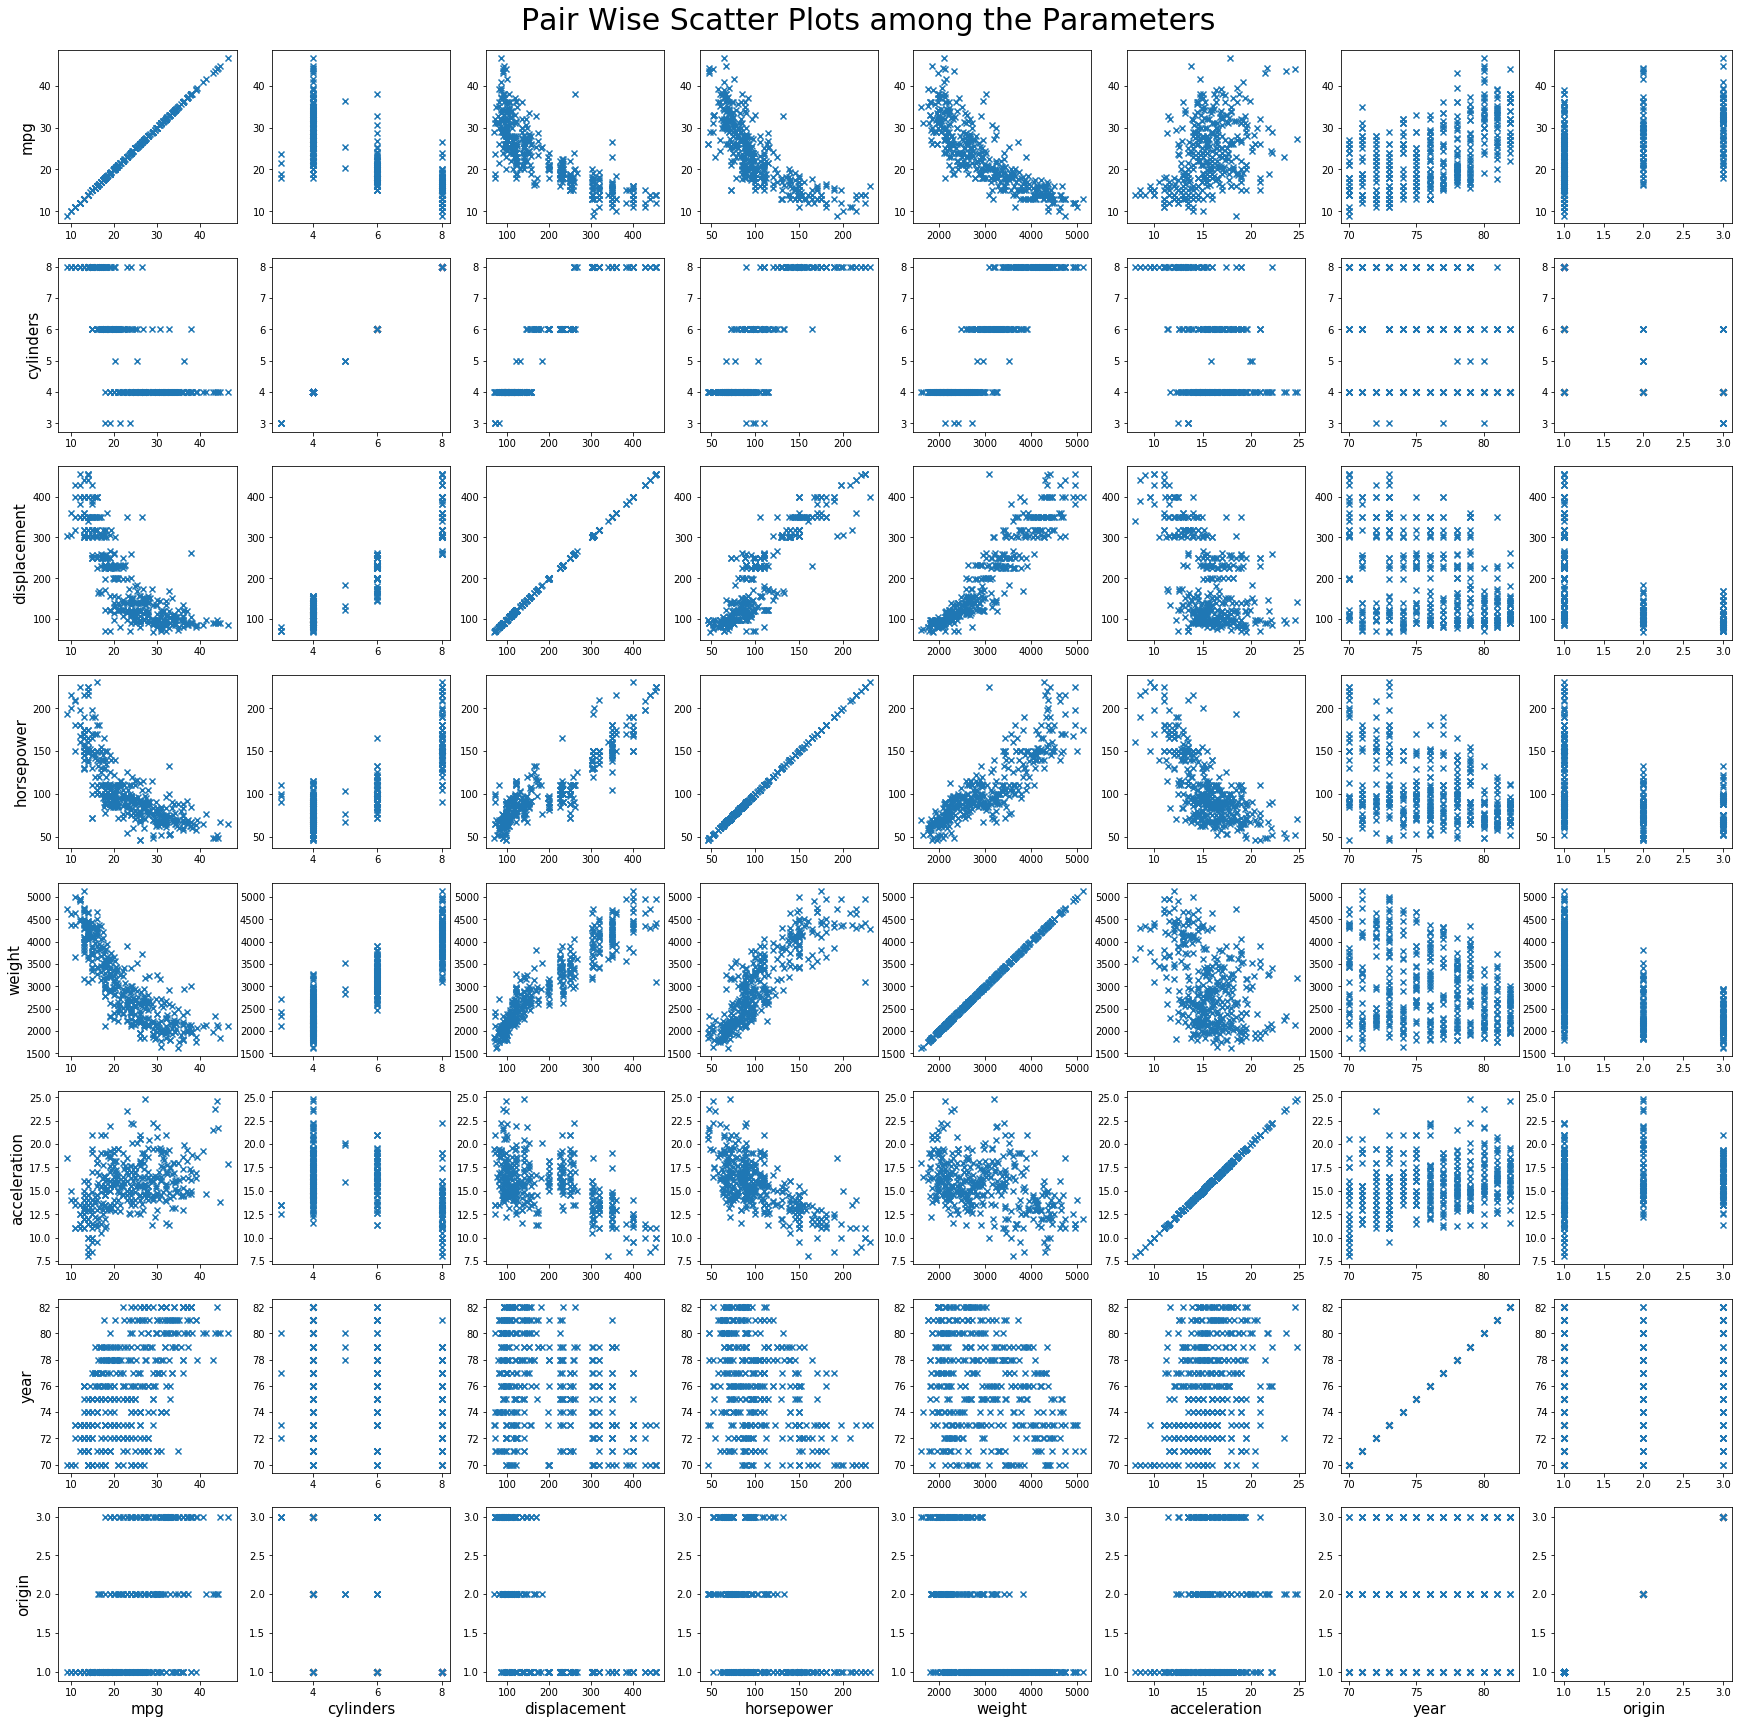

In [184]:
# Plot the feature plots to observe the relationships between all the predictors
fig, ax = plt.subplots(len(cols),len(cols),figsize=(30,30))
for f1,i in zip(cols,range(len(cols))):
    for f2,j in zip(cols,range(len(cols))): 
        feat1 = data[f1]
        feat2 = data[f2]
        ax[i][j].scatter(feat2, feat1, marker='x')
    ax[i][0].set_ylabel(f1, fontsize=15)
    ax[7][i].set_xlabel(f1, fontsize=15)
fig.suptitle("Pair Wise Scatter Plots among the Parameters",y=0.9,fontsize=30)

#### Solution 1:

The relationship between all the variable pairs are not linear. 

The four pairs of variables showing different connections are as follows:
 
i) horsepower vs weight:

The variables horsepower has strong postive correlation with a correlation coefficient of 0.8645774. The scatter plot also shows linear relation between the variables with a cloud that lies within a small neighbourhood around the mid line.

ii) displacement vs mpg: 

The correlation coefficients of -0.80 shows a negative correlation between the two variables. The connection is however not purely linear but looks more like a negative exponential relationship from the scatter plot.

iii) year vs weight:

From the correlation coefficient value of -0.30911 the two variables are slightly negatively correlated. The connection is however not very clear as the scatter plot doesn't shows a clear relation between the two.

iv) origin vs year:

The correlation value between these two variable is close to 0 which signifies that the two values donot have any to very little relation between one another.

### 2. Correlation

#### Solution 2:

From the scatter plots the variable pair 'horsepower' and 'weight' appears to be having highest postive correlation with a value of 0.86453.

The variable pair 'mpg' and 'weight' appears to be having highest negative correlation with a value of -0.832244.

From the np.corrcoef() of all the parameters we don't get the expected value for the positively correlated pair as the highest postive correlation is given by the pair 'cylinders' and 'displacement' but the highest negative correlation is given by the expected pair.

In [186]:
# Use np corrcoef to observe the correlation between  predictors

print("correlation between the predictor mpg and displacement ",np.corrcoef(data[['mpg','displacement']].T)[0][1]) ## transpose is required as np.corrcoef takes in array with rows representing the variables 
print("correlation between the predictor weight and horsepower ",np.corrcoef(data[['weight','horsepower']].T)[0][1])

print("\n",np.corrcoef(data[cols].T))

correlation between the predictor mpg and displacement  -0.805126946710458
correlation between the predictor weight and horsepower  0.8645377375741443

 [[ 1.         -0.77761751 -0.80512695 -0.77842678 -0.83224421  0.42332854
   0.58054097  0.56520876]
 [-0.77761751  1.          0.9508233   0.84298336  0.89752734 -0.50468338
  -0.34564744 -0.56893159]
 [-0.80512695  0.9508233   1.          0.897257    0.9329944  -0.5438005
  -0.36985521 -0.61453511]
 [-0.77842678  0.84298336  0.897257    1.          0.86453774 -0.68919551
  -0.41636148 -0.45517145]
 [-0.83224421  0.89752734  0.9329944   0.86453774  1.         -0.4168392
  -0.30911988 -0.58500535]
 [ 0.42332854 -0.50468338 -0.5438005  -0.68919551 -0.4168392   1.
   0.29031611  0.21274581]
 [ 0.58054097 -0.34564744 -0.36985521 -0.41636148 -0.30911988  0.29031611
   1.          0.18152772]
 [ 0.56520876 -0.56893159 -0.61453511 -0.45517145 -0.58500535  0.21274581
   0.18152772  1.        ]]


### 3. Linear Regression

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#linear_model = LinearRegression()

variables=['cylinders','displacement','horsepower','year'] #cylinders, displacement, horsepower and year
y = np.array(data['mpg']).reshape(-1, 1)

##running a loop to accoomodate all the required parameters

for variable in variables: 
    x = np.array(data[variable]).reshape(-1, 1)
    print(x.shape, y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    # Use the fit function and the score function in linear regression module of sklearn to  fit the data and observe the fit
    model = LinearRegression().fit(X_train,y_train)
    print("score for model fitted with variable mpg and "+variable ,model.score(X_train, y_train))
    y_pred = model.predict(X_test)
    print("R2 value of the model on the test set: ",r2_score(y_test, y_pred))



(392, 1) (392, 1)
score for model fitted with variable mpg and cylinders 0.6291370680023967
R2 value of the model on the test set:  0.49266098596654473
(392, 1) (392, 1)
score for model fitted with variable mpg and displacement 0.6237330469327591
R2 value of the model on the test set:  0.734936426737621
(392, 1) (392, 1)
score for model fitted with variable mpg and horsepower 0.5781495629280414
R2 value of the model on the test set:  0.7135197172216796
(392, 1) (392, 1)
score for model fitted with variable mpg and year 0.34219160802158033
R2 value of the model on the test set:  0.2113858414811216


#### Solution 3:

'displacement' appears to have the most statistically significant relationship to the outcome quantised by the model score.
Among the resulting models the model with 'displacement' as the predictor performs the best on the testing dataset with a R2 value of 0.62,than all the other models.

In [188]:
# Fit the linear regression on mpg for the other features: cylinder, horsepower, year and displacement

In [190]:
#Multiple Linear Regression
#Create a 2D matrix with each column representing all features
#Look up np.concatenate or np.stack
colX=cols[1:]
colY=cols[0]
x=np.array(data[colX])
y=np.array(data[colY])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model=LinearRegression().fit(X_train,y_train)
print("Model Score: ",model.score(X_train,y_train))
y_pred=model.predict(X_test)
print("R2 score on the test data:",r2_score(y_test, y_pred))
print(model.get_params())
#Print the predictions of the your fitted model and the weights of Linear Regression (look at the function get_params())
print("the model coefficient are :",model.coef_)
print("the prediction on the testing dataset is as follows:\n",y_pred)

Model Score:  0.8229921935381715
R2 score on the test data: 0.8121534633642532
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
the model coefficient are : [-0.41478147  0.02224535 -0.0250609  -0.00674243  0.0850604   0.76926321
  1.49832413]
the prediction on the testing dataset is as follows:
 [25.31567863 26.93746301 24.55207608 31.28336807 26.01895608 29.35908971
  9.8506179  11.97740346 16.30341535 30.92639967 22.90876296 26.79002207
  9.63790372 22.87353941 21.024478   25.33583085 19.75505531 30.74183433
 28.22057783 32.34861535  8.33429372 33.03877418 22.62477931 33.29270144
 20.92200595 26.13702216 33.20045749 31.21764879 32.3981537  21.90780986
 20.8411397   9.42272533  8.20024066 28.70101475 25.62002185 27.31802762
 19.61428454  6.20335031 33.08052179 16.55083112 14.94256297 20.75254323
 12.55203984 14.93918205 11.73894784 17.29409284 29.93364297 24.93998425
 35.95741355 19.47762226  8.86127858 19.51504414 30.4164649  27.4972158
  9.57353356 30.0242

#### Solution 4:

a) The model trained with all the predictors performs better than the models present in Q 5.3 with a model score of 0.8231 on the training dataset and a R2 value of ~0.81 on the test dataset.

b) Combing multiple predictors helps the model performance as predictors often work in combination to arrive at better response which is not possible with models trained on single predictor.
    The sign of coefficient depicts the relationship between the corresponding predictor and the response. A positive sign represents a positve slope and hence a positive correlation between the predictor and the response and vice versa.  
For example, from the trained model coefficients the coefficient corresponding to the predictor 'cylinders' is -0.42 which signifies a negative correlation which is further evident from the earlier scatter plot as well.

Text(0.5, 0, 'residuals')

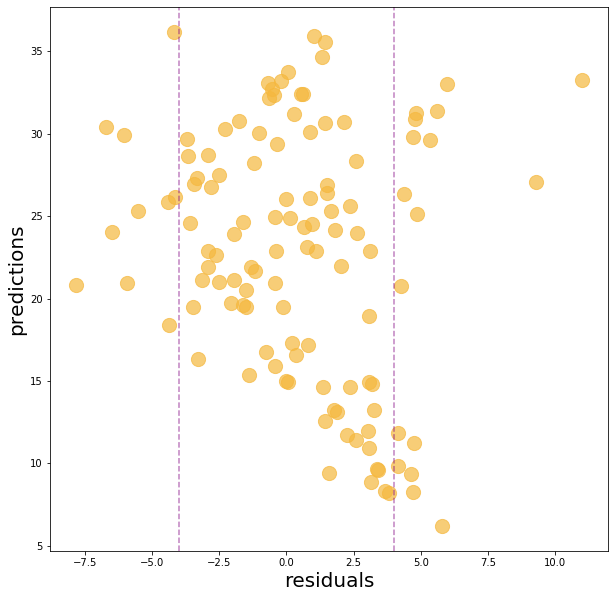

In [191]:
#Make a scatter plot of the residual vs the predictions of your linear regression model
fig=plt.figure(figsize=(10,10))
plt.scatter(y_test-y_pred,y_pred,s=200,alpha=0.7,color="#F5B83E")
plt.axvline(x = -4, color = 'purple', linestyle = '--',alpha=0.5)
plt.axvline(x = 4, color = 'purple', linestyle = '--',alpha=0.5)
plt.ylabel("predictions",fontsize=20)
plt.xlabel("residuals",fontsize=20)

#### Solution 5:

The above plot points towards the nonlinearity in the relationship between the response variable and its predictors. This is infered as if the data would have been linearly related the residual produced should be in a specified range for all values of predictions, which is clearly not the case here as for high prediction values the residual values are high.
